In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'distil(roberta)-combined'
MODEL_NAME = 'distilroberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df[class_names].values
english_val_labels = val_df[class_names].values
english_test_labels = test_df[class_names].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df[class_names].values
urdu_val_labels = val_df[class_names].values
urdu_test_labels = test_df[class_names].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df[class_names].values
sindhi_val_labels = val_df[class_names].values
sindhi_test_labels = test_df[class_names].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

maddr11 maxblumenthal israel containing muslim violence thing muslims respond violence [0 0 0 0 1]
ہم سب سفید نہیں میری دوڑ میں آنے والی نسل نہیں لانے [0 0 0 1 0]
اس کتیا لگتا میں اس کا بچہ ہوں، وہ گزشتہ بار [0 1 0 0 0]
ثنا هن ڇوڪريءَ کي منهنجي ذاتي خواهشن آهي دنيا ۾ واحد شخص جيڪو هن کان وڌيڪ آهي ايڪسل آهي اها ڪچي هئي جنهن فيصلو ڪيو ته هن جي ڪيترن ئي لباسن ڪهڙي هن کي اندر وٺي وڃي ان ڪري مون صرف ان ۾ ڪجهه ذاتي ٽچ شامل ڪيا ⁇ [0 1 0 0 0]
dis bitch a hoe im ايترو مايوس ⁇ ️ [0 1 0 0 0]


In [6]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, np.array(train_labels), tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, np.array(val_labels), tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.76it/s, loss=0.19] 


Train loss 0.23185061264509302 accuracy 0.5336475942782835
Validation loss 0.1956604771362521 accuracy 0.5707041154671347
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.5707041154671347
Epoch 1/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.62it/s, loss=0.173] 


Train loss 0.19117704856928938 accuracy 0.6114325964456003
Validation loss 0.18562905671628746 accuracy 0.6096482673428255
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.6096482673428255
Epoch 2/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.75it/s, loss=0.177] 


Train loss 0.17999621672393049 accuracy 0.6414499349804942
Validation loss 0.1813842323211771 accuracy 0.6446264872244978
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.6446264872244978
Epoch 3/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.68it/s, loss=0.168] 


Train loss 0.17102225710755414 accuracy 0.6650303424360642
Validation loss 0.18098771804459626 accuracy 0.6711852285287042
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.6711852285287042
Epoch 4/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.70it/s, loss=0.152] 


Train loss 0.16439142208882246 accuracy 0.6848829648894669
Validation loss 0.18202171085901914 accuracy 0.6851310057863598
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.6851310057863598
Epoch 5/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.71it/s, loss=0.145] 


Train loss 0.1575328790674428 accuracy 0.7022214997832683
Validation loss 0.18392020237792803 accuracy 0.6908848579416162
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.6908848579416162
Epoch 6/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.64it/s, loss=0.161] 


Train loss 0.15176814038631986 accuracy 0.720654529692241
Validation loss 0.1879629643784987 accuracy 0.7008647032052532
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.7008647032052532
Epoch 7/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.56it/s, loss=0.133] 


Train loss 0.14598909016290418 accuracy 0.733690940615518
Validation loss 0.19231892705521317 accuracy 0.7074637539821859
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.7074637539821859
Epoch 8/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.68it/s, loss=0.135] 


Train loss 0.1416906531920835 accuracy 0.7449609882964889
Validation loss 0.19547297285091356 accuracy 0.7118197776477472
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.7118197776477472
Epoch 9/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.75it/s, loss=0.136] 


Train loss 0.13753673389306015 accuracy 0.7565344603381015
Validation loss 0.1934582809307719 accuracy 0.709706781093557
No improvement in validation accuracy for 1 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.66it/s, loss=0.105] 


Train loss 0.1335340444897605 accuracy 0.7659081057650629
Validation loss 0.19911329448997603 accuracy 0.7124374227943566
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.7124374227943566
Epoch 11/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.60it/s, loss=0.116] 


Train loss 0.12886872536783078 accuracy 0.7751192024273948
Validation loss 0.21078551359273293 accuracy 0.7224497756972889
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.7224497756972889
Epoch 12/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.71it/s, loss=0.113] 


Train loss 0.12530180332916124 accuracy 0.7842002600780235
Validation loss 0.2082148394286013 accuracy 0.7146154346271374
No improvement in validation accuracy for 1 epochs.
Epoch 13/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.74it/s, loss=0.113] 


Train loss 0.12269694499940134 accuracy 0.7908647594278283
Validation loss 0.21509681374082446 accuracy 0.7189714582926988
No improvement in validation accuracy for 2 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.60it/s, loss=0.105] 


Train loss 0.11843061113107468 accuracy 0.8004226267880364
Validation loss 0.21838909228043843 accuracy 0.723294974318965
Model and tokenizer saved at epoch 14
Checkpoint saved: Improved validation accuracy at epoch 14: 0.723294974318965
Epoch 15/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.66it/s, loss=0.116] 


Train loss 0.11478604523312616 accuracy 0.8084200260078024
Validation loss 0.2294817060201183 accuracy 0.7191665041284702
No improvement in validation accuracy for 1 epochs.
Epoch 16/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.61it/s, loss=0.087] 


Train loss 0.11210538544814812 accuracy 0.816829215431296
Validation loss 0.22604030398593872 accuracy 0.7321370522072687
Model and tokenizer saved at epoch 16
Checkpoint saved: Improved validation accuracy at epoch 16: 0.7321370522072687
Epoch 17/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.64it/s, loss=0.112] 


Train loss 0.10934917199659198 accuracy 0.8222691807542263
Validation loss 0.2264454601460336 accuracy 0.7286912424419739
No improvement in validation accuracy for 1 epochs.
Epoch 18/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.63it/s, loss=0.0924]


Train loss 0.10563306131460878 accuracy 0.8308842652795839
Validation loss 0.2392878341110977 accuracy 0.735225277940316
Model and tokenizer saved at epoch 18
Checkpoint saved: Improved validation accuracy at epoch 18: 0.735225277940316
Epoch 19/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.69it/s, loss=0.0717]


Train loss 0.10216267667349102 accuracy 0.8377546597312527
Validation loss 0.24306913806036456 accuracy 0.7405565307847344
Model and tokenizer saved at epoch 19
Checkpoint saved: Improved validation accuracy at epoch 19: 0.7405565307847344
Epoch 20/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.72it/s, loss=0.107] 


Train loss 0.09859337902339835 accuracy 0.8455461638491547
Validation loss 0.25710880484532667 accuracy 0.7438398023535531
Model and tokenizer saved at epoch 20
Checkpoint saved: Improved validation accuracy at epoch 20: 0.7438398023535531
Epoch 21/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.68it/s, loss=0.0893]


Train loss 0.09638389505978141 accuracy 0.8504442999566537
Validation loss 0.25136726227997497 accuracy 0.7421819127494962
No improvement in validation accuracy for 1 epochs.
Epoch 22/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.68it/s, loss=0.0891]


Train loss 0.0926086982110213 accuracy 0.8574880797572605
Validation loss 0.25988987068066727 accuracy 0.7383135036733632
No improvement in validation accuracy for 2 epochs.
Epoch 23/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.60it/s, loss=0.0661]


Train loss 0.08976641894756053 accuracy 0.8632639791937581
Validation loss 0.2604149540348013 accuracy 0.7387686106234965
No improvement in validation accuracy for 3 epochs.
Epoch 24/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.73it/s, loss=0.0671]


Train loss 0.08539496056849186 accuracy 0.871640658864326
Validation loss 0.28155876250004325 accuracy 0.7459853065470385
Model and tokenizer saved at epoch 24
Checkpoint saved: Improved validation accuracy at epoch 24: 0.7459853065470385
Epoch 25/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.65it/s, loss=0.049] 


Train loss 0.0831304201636665 accuracy 0.8769072388383181
Validation loss 0.2717468488086286 accuracy 0.7417593134386581
No improvement in validation accuracy for 1 epochs.
Epoch 26/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.69it/s, loss=0.0481]


Train loss 0.0794221586748007 accuracy 0.8837993064586043
Validation loss 0.28222631963585615 accuracy 0.7487159482478383
Model and tokenizer saved at epoch 26
Checkpoint saved: Improved validation accuracy at epoch 26: 0.7487159482478383
Epoch 27/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.79it/s, loss=0.0476]


Train loss 0.07606579045585554 accuracy 0.8907347204161249
Validation loss 0.29515465589050444 accuracy 0.7490735322800858
Model and tokenizer saved at epoch 27
Checkpoint saved: Improved validation accuracy at epoch 27: 0.7490735322800858
Epoch 28/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.80it/s, loss=0.0565]


Train loss 0.07401659250215481 accuracy 0.893508885999133
Validation loss 0.29041842598925016 accuracy 0.7494961315909239
Model and tokenizer saved at epoch 28
Checkpoint saved: Improved validation accuracy at epoch 28: 0.7494961315909239
Epoch 29/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.60it/s, loss=0.0674] 


Train loss 0.0702158776809424 accuracy 0.8994364976159515
Validation loss 0.2962121656958378 accuracy 0.7449125544502958
No improvement in validation accuracy for 1 epochs.
Epoch 30/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.73it/s, loss=0.0567]


Train loss 0.06727732371425207 accuracy 0.9070329432162982
Validation loss 0.30940669037695984 accuracy 0.747708211429686
No improvement in validation accuracy for 2 epochs.
Epoch 31/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.78it/s, loss=0.0301] 


Train loss 0.06489894787771898 accuracy 0.9092761161681838
Validation loss 0.3228823545383069 accuracy 0.7547623691567519
Model and tokenizer saved at epoch 31
Checkpoint saved: Improved validation accuracy at epoch 31: 0.7547623691567519
Epoch 32/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.70it/s, loss=0.0453]


Train loss 0.06078408247773147 accuracy 0.9169050715214564
Validation loss 0.3317240173163632 accuracy 0.7505363760483713
No improvement in validation accuracy for 1 epochs.
Epoch 33/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:27<00:00,  9.75it/s, loss=0.032] 


Train loss 0.05828981160673206 accuracy 0.9216731686172518
Validation loss 0.33810539621077557 accuracy 0.7501462843768285
No improvement in validation accuracy for 2 epochs.
Epoch 34/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:30<00:00,  9.60it/s, loss=0.0427]


Train loss 0.05549188742954052 accuracy 0.9253034243606415
Validation loss 0.33910578298779387 accuracy 0.7503088225733048
No improvement in validation accuracy for 3 epochs.
Epoch 35/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:29<00:00,  9.64it/s, loss=0.0152]


Train loss 0.05368971473753101 accuracy 0.928998699609883
Validation loss 0.3282200552817442 accuracy 0.7469280280866003
No improvement in validation accuracy for 4 epochs.
Epoch 36/50
----------


Training Progress: 100%|██████████| 1442/1442 [02:28<00:00,  9.72it/s, loss=0.0162] 


Train loss 0.0503446021846763 accuracy 0.9329865626354573
Validation loss 0.3490180991388656 accuracy 0.7508289448020284
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


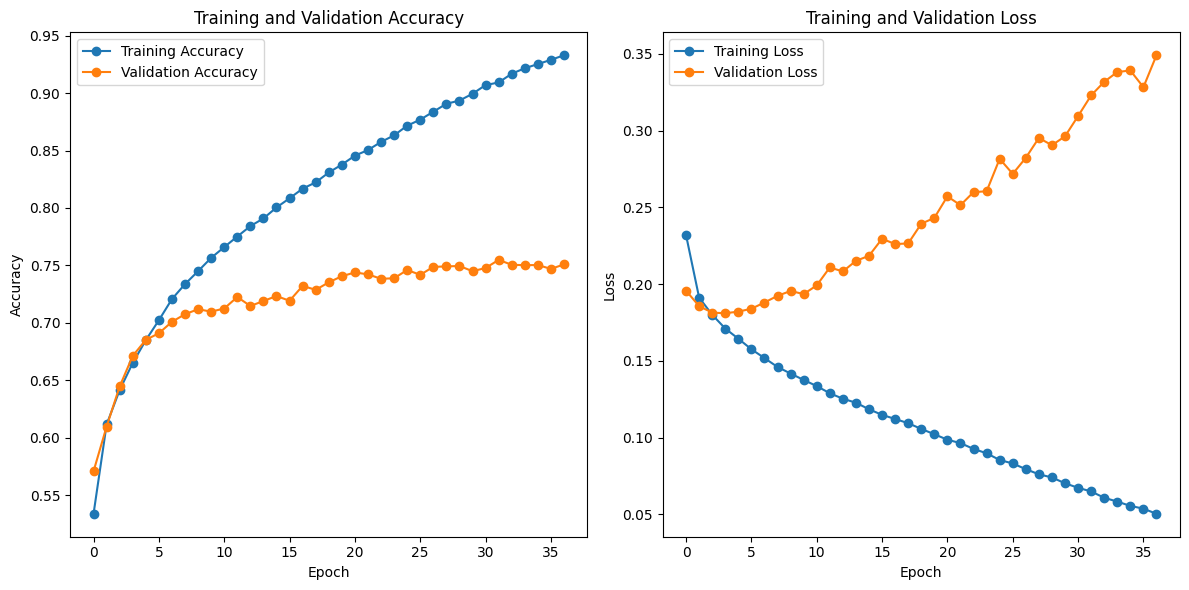

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, np.array(test_labels)             , tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.75 Test Loss: 0.3561320197371584


Accuracy: 0.75
F1 Score: 0.74
Precision: 0.74
Recall: 0.75

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.34      0.06      0.10      1155
     Gender/Sexual       0.77      0.73      0.75     10919
Origin/Nationality       0.34      0.59      0.43       230
    Race/Ethnicity       0.71      0.78      0.74      9370
          Religion       0.80      0.83      0.82      9088

          accuracy                           0.75     30762
         macro avg       0.59      0.60      0.57     30762
      weighted avg       0.74      0.75      0.74     30762



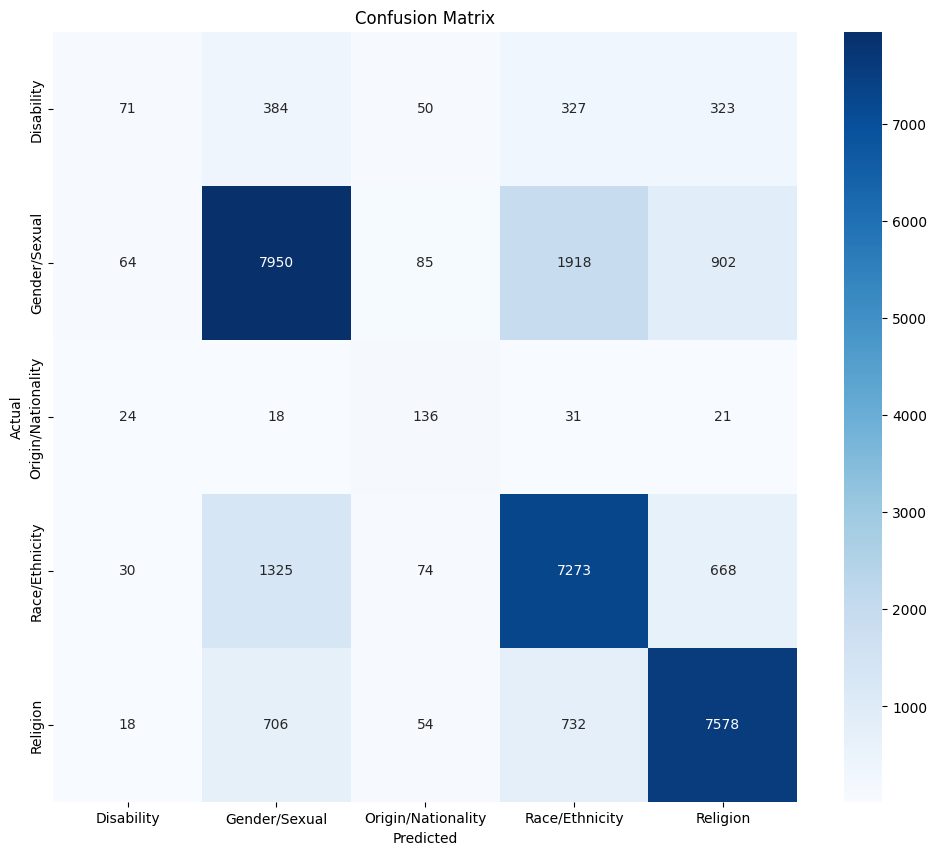

In [12]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [11]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00


In [13]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00
